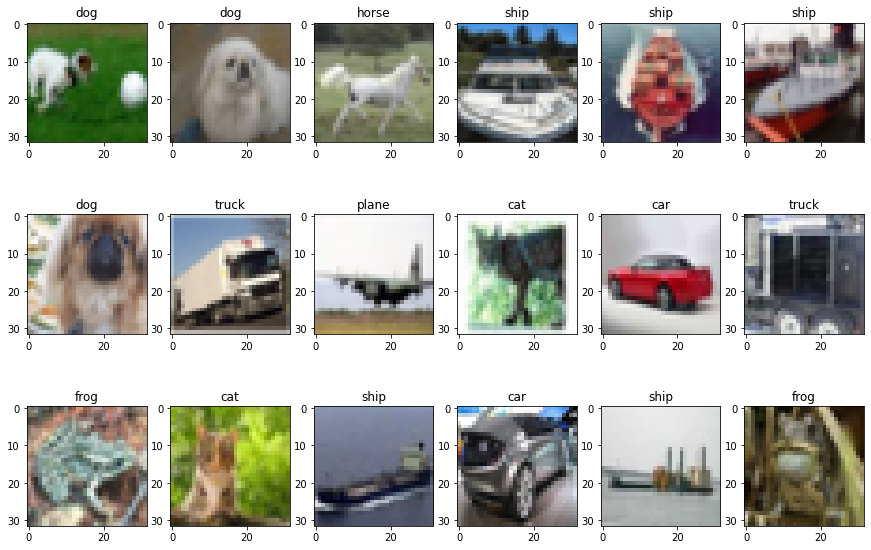

In [3]:
import cv2
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras import Model
from keras.constraints import maxnorm

from time import time

from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
num_train_samples = y_train.shape[0]
size = x_train[0].shape

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, num_train_samples)
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

(Text(0.5, 0, 'Class'), Text(0, 0.5, 'Counts'))

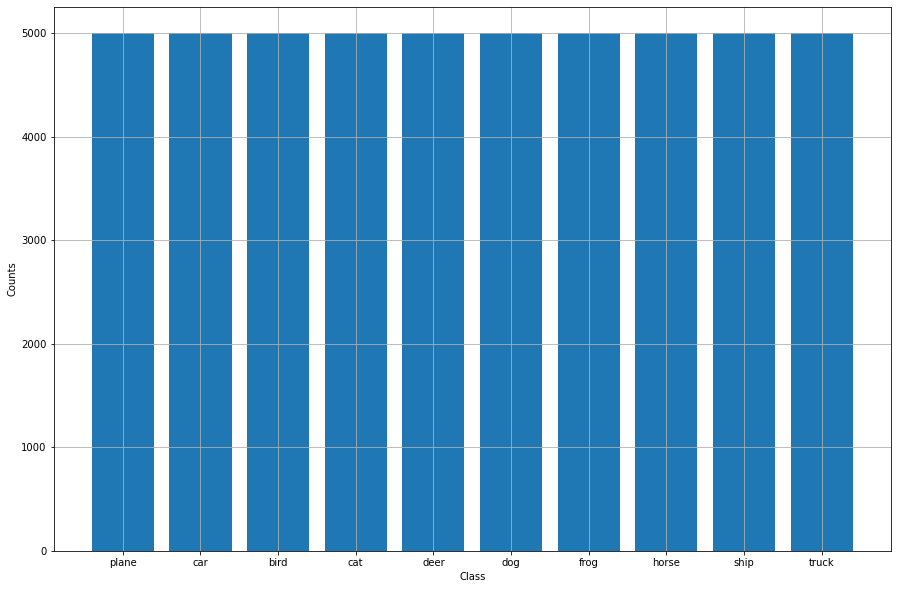

In [112]:
# Compute the class histogram
hist = np.zeros(10)
for i, val in enumerate(y_train):
    hist[val[0]] = hist[val[0]] + 1
    

plt.bar(classes.values(), hist), plt.grid(True)
plt.xlabel('Class'), plt.ylabel('Counts')

In [4]:
# Normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)


Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


In [5]:
# Function to display training history
def show_fit_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])

    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])    

Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_27 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_88 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_74 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_89 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_75 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_90 (Conv2D)          (None, 8, 8, 128)         738

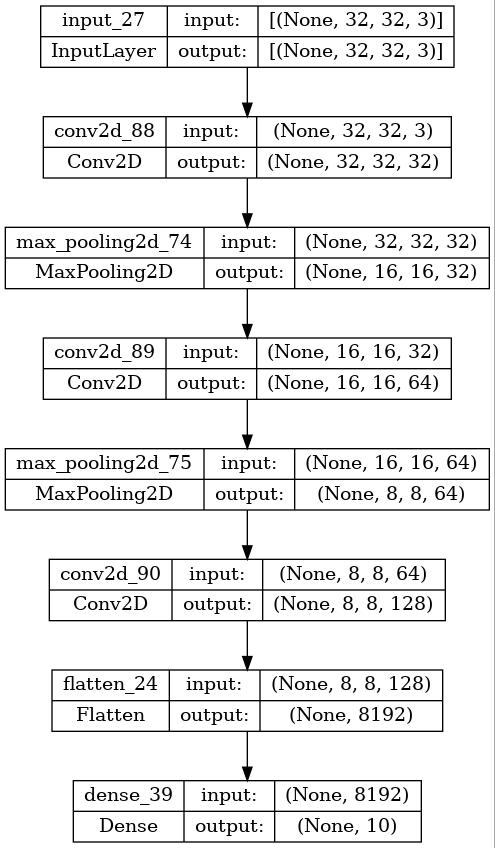

In [129]:
# Build the classifier.
# MODEL #1

inputs = Input(shape=size)

net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)

net = Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = MaxPooling2D(pool_size=(2, 2))(net)

net = Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same')(net)

net = Flatten()(net)

outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)

# Show the model
model.summary()

# Plot the model
tf.keras.utils.plot_model(model, to_file='model.jpg', show_shapes=True, show_layer_names=True)


In [130]:
# Compile the model #1
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model #1
epochs = 25
batch_size = 128

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/25
391/391 [==============================] - 47s 107ms/step - loss: 1.5182 - accuracy: 0.4570 - val_loss: 1.2332 - val_accuracy: 0.5599
Epoch 2/25
391/391 [==============================] - 29s 74ms/step - loss: 1.1155 - accuracy: 0.6120 - val_loss: 1.0346 - val_accuracy: 0.6377
Epoch 3/25
391/391 [==============================] - 31s 78ms/step - loss: 0.9434 - accuracy: 0.6743 - val_loss: 0.9424 - val_accuracy: 0.6736
Epoch 4/25
391/391 [==============================] - 30s 77ms/step - loss: 0.8244 - accuracy: 0.7167 - val_loss: 0.8955 - val_accuracy: 0.6887
Epoch 5/25
391/391 [==============================] - 29s 75ms/step - loss: 0.7428 - accuracy: 0.7441 - val_loss: 0.8802 - val_accuracy: 0.7017
Epoch 6/25
391/391 [==============================] - 29s 75ms/step - loss: 0.6828 - accuracy: 0.7647 - val_loss: 0.8104 - val_accuracy: 0.7221
Epoch 7/25
391/391 [==============================] - 28s 73ms/step - loss: 0.6161 - accuracy: 0.7886 - val_loss: 0.8085 - val_accuracy

Train Acc      0.9724199771881104
Validation Acc 0.7197999954223633


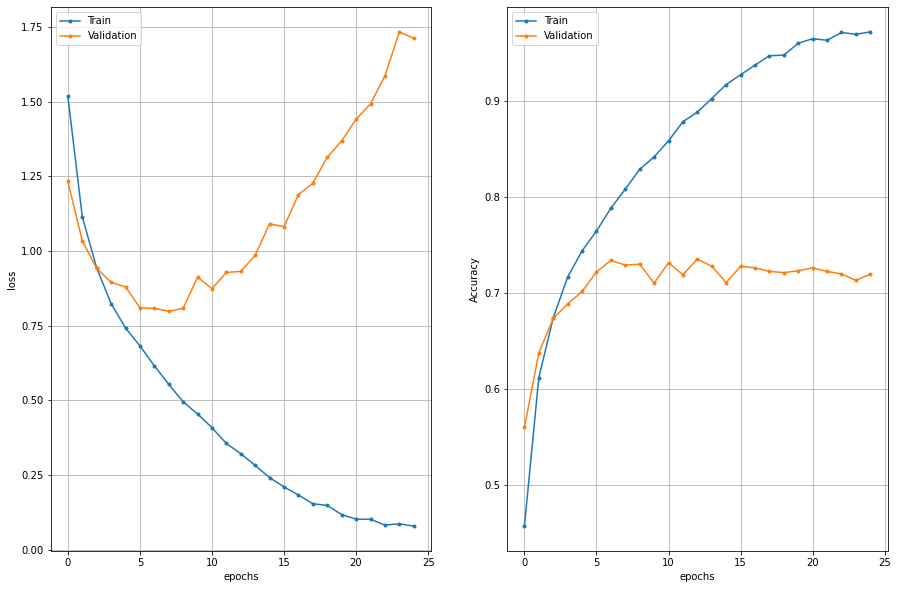

In [131]:
# Show training history
show_fit_history(history)

**The plots show some overfitting. Let's try to improve the model.**

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                       

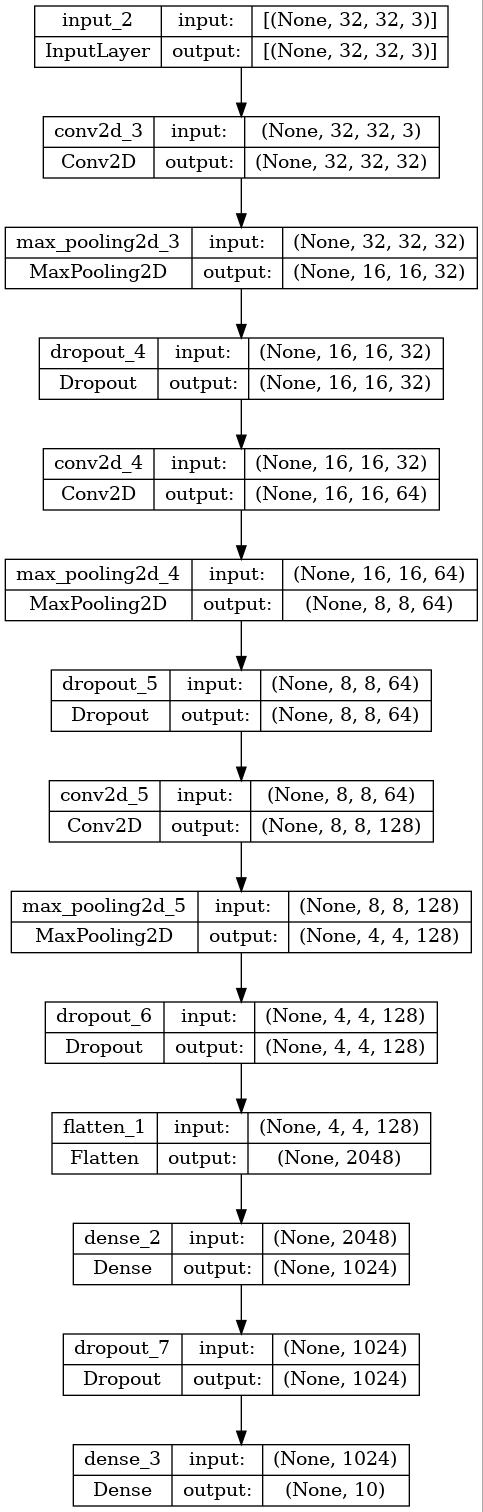

In [7]:
# Build the classifier.
# MODEL #2

inputs = Input(shape=size)

net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.2)(net)

net = Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.2)(net)

net = Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.2)(net)

net = Flatten()(net)
net = Dense(1024, activation="relu")(net)
net = Dropout(0.5)(net)

outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)

# Show the model
model.summary()

# Plot the model
tf.keras.utils.plot_model(model, to_file='model.jpg', show_shapes=True, show_layer_names=True)


In [8]:
# Compile the model #2
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model #2
epochs = 25
batch_size = 128

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))


Epoch 1/25
391/391 [==============================] - 151s 353ms/step - loss: 1.6298 - accuracy: 0.4021 - val_loss: 1.3136 - val_accuracy: 0.5215
Epoch 2/25
391/391 [==============================] - 58s 148ms/step - loss: 1.2245 - accuracy: 0.5616 - val_loss: 1.0903 - val_accuracy: 0.6053
Epoch 3/25
391/391 [==============================] - 46s 118ms/step - loss: 1.0454 - accuracy: 0.6281 - val_loss: 0.9225 - val_accuracy: 0.6805
Epoch 4/25
391/391 [==============================] - 49s 126ms/step - loss: 0.9305 - accuracy: 0.6718 - val_loss: 0.8739 - val_accuracy: 0.6902
Epoch 5/25
391/391 [==============================] - 45s 114ms/step - loss: 0.8672 - accuracy: 0.6947 - val_loss: 0.8164 - val_accuracy: 0.7157
Epoch 6/25
391/391 [==============================] - 51s 132ms/step - loss: 0.8098 - accuracy: 0.7164 - val_loss: 0.7815 - val_accuracy: 0.7262
Epoch 7/25
391/391 [==============================] - 44s 111ms/step - loss: 0.7574 - accuracy: 0.7322 - val_loss: 0.7310 - val_a

Train Acc      0.8665400147438049
Validation Acc 0.796500027179718


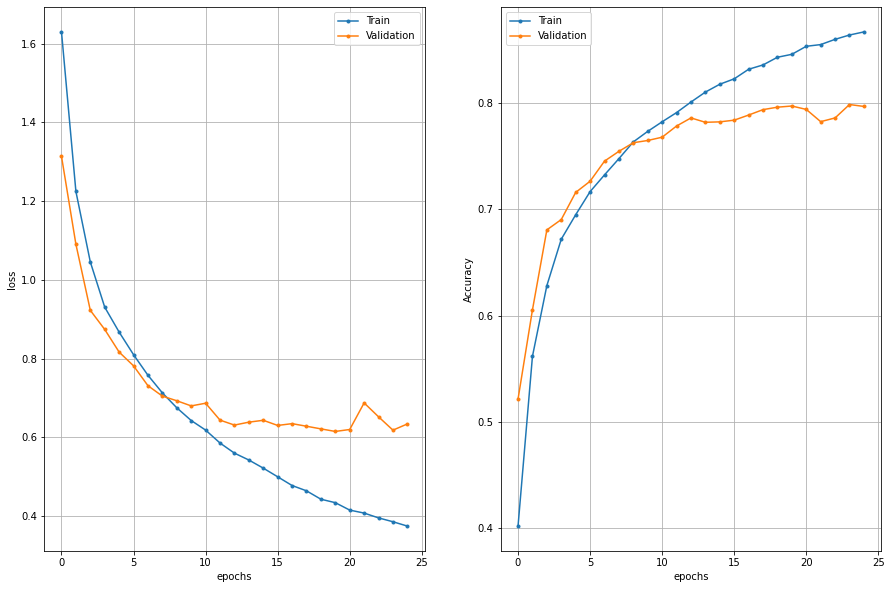

In [9]:
# Show training history
show_fit_history(history)

**The plots show that the new model no longer has overfitting, and the accuracy even increased from ~72% to ~80%. Not bad. Let's try to make some changes to improve the model even more.**

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0   

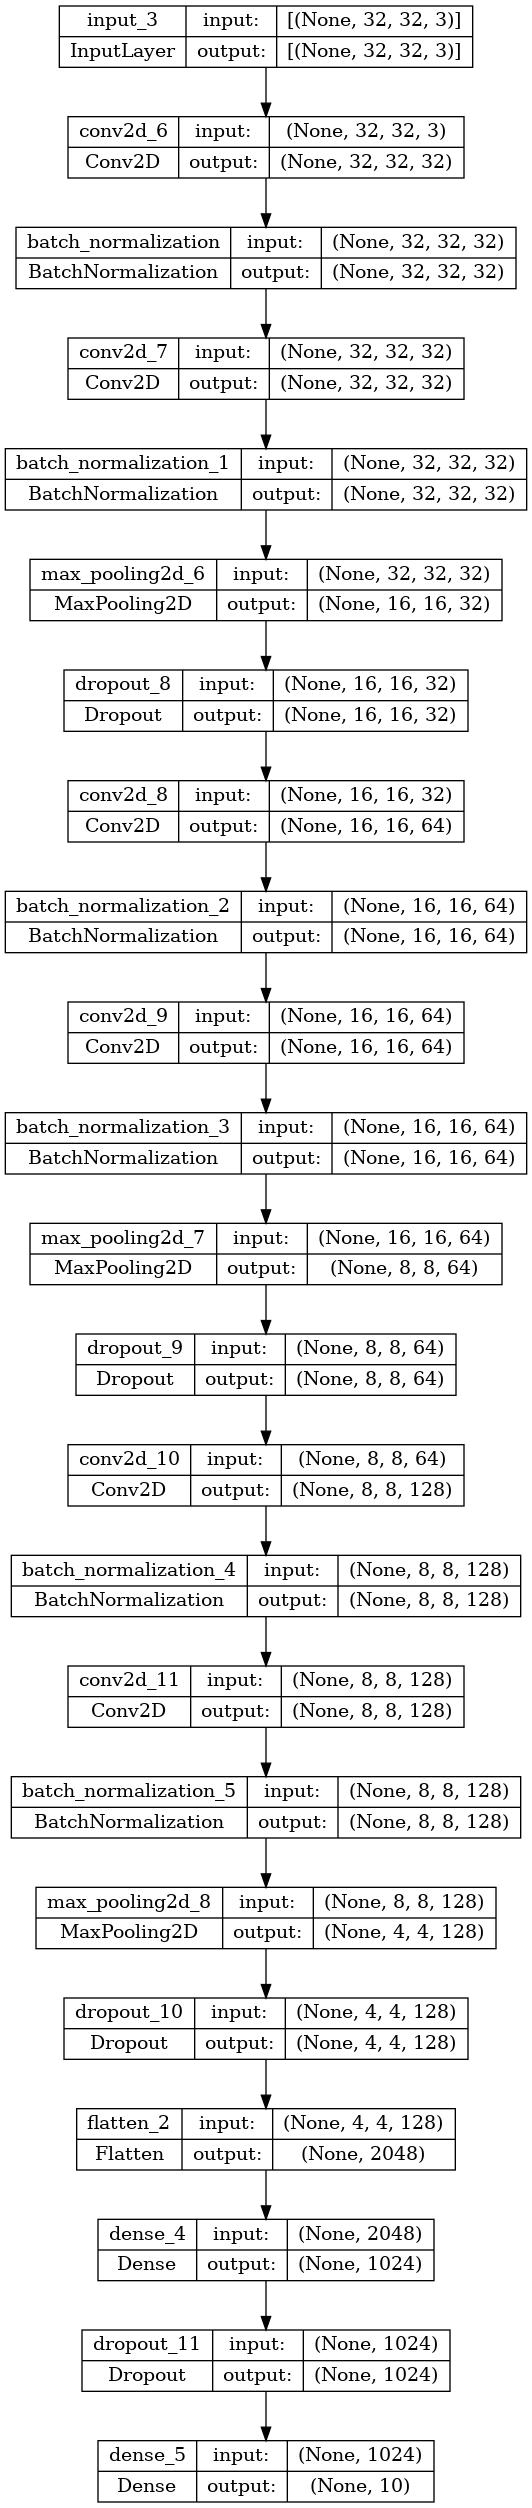

In [10]:
# Build the classifier.
# MODEL #3

inputs = Input(shape=x_train[0].shape)

net = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
net = BatchNormalization()(net)

net = Conv2D(32, (3, 3), activation='relu', padding='same')(net)
net = BatchNormalization()(net)
net = MaxPooling2D((2, 2))(net)
net = Dropout(0.2)(net)
 
net = Conv2D(64, (3, 3), activation='relu', padding='same')(net)
net = BatchNormalization()(net)

net = Conv2D(64, (3, 3), activation='relu', padding='same')(net)
net = BatchNormalization()(net)
net = MaxPooling2D((2, 2))(net)
net = Dropout(0.2)(net)
 
net = Conv2D(128, (3, 3), activation='relu', padding='same')(net)
net = BatchNormalization()(net)

net = Conv2D(128, (3, 3), activation='relu', padding='same')(net)
net = BatchNormalization()(net)
net = MaxPooling2D((2, 2))(net)
net = Dropout(0.2)(net)
 
net = Flatten()(net)
 
net = Dense(1024, activation='relu')(net)
net = Dropout(0.5)(net)

outputs = Dense(num_classes, activation='softmax')(net)
 
model = Model(inputs, outputs)

# Show the model
model.summary()

# Plot the model
tf.keras.utils.plot_model(model, to_file='model.jpg', show_shapes=True, show_layer_names=True)


In [11]:
# Compile the model #3
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model #3
epochs = 25
batch_size = 128

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/25
391/391 [==============================] - 171s 422ms/step - loss: 1.6130 - accuracy: 0.4604 - val_loss: 2.7287 - val_accuracy: 0.2149
Epoch 2/25
391/391 [==============================] - 131s 336ms/step - loss: 1.0784 - accuracy: 0.6198 - val_loss: 0.9312 - val_accuracy: 0.6714
Epoch 3/25
391/391 [==============================] - 121s 308ms/step - loss: 0.8841 - accuracy: 0.6893 - val_loss: 0.8397 - val_accuracy: 0.7129
Epoch 4/25
391/391 [==============================] - 121s 309ms/step - loss: 0.7634 - accuracy: 0.7332 - val_loss: 0.8044 - val_accuracy: 0.7178
Epoch 5/25
391/391 [==============================] - 126s 321ms/step - loss: 0.6945 - accuracy: 0.7613 - val_loss: 0.7091 - val_accuracy: 0.7629
Epoch 6/25
391/391 [==============================] - 168s 430ms/step - loss: 0.6183 - accuracy: 0.7857 - val_loss: 0.6621 - val_accuracy: 0.7712
Epoch 7/25
391/391 [==============================] - 149s 380ms/step - loss: 0.5667 - accuracy: 0.8023 - val_loss: 0.6149 -

Train Acc      0.934440016746521
Validation Acc 0.8416000008583069


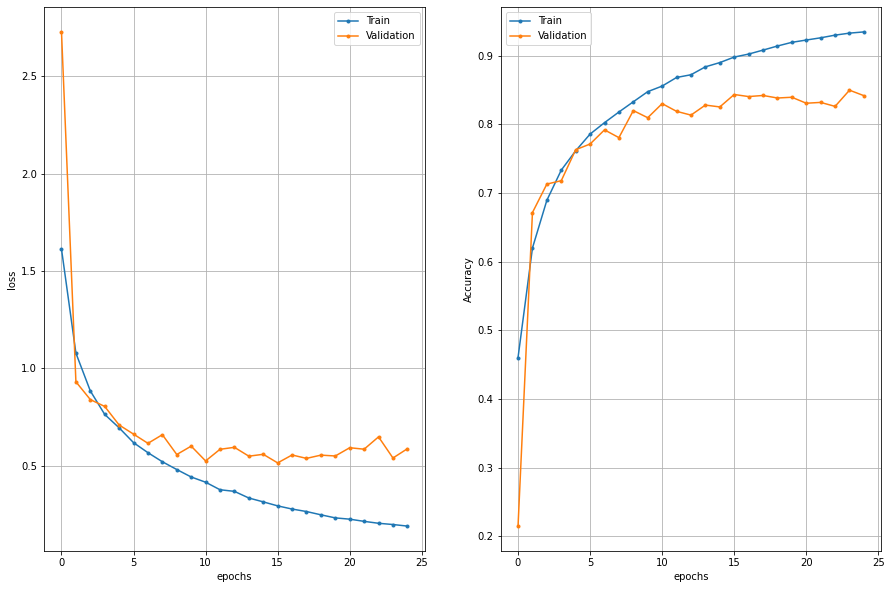

In [12]:
# Show training history
show_fit_history(history)

**Looks better but not enough. Let's generate more training data and train the network more.**

In [13]:
# Data augmentation
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
 
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
 
history = model.fit(train_generator, validation_data=(x_test, y_test),
              steps_per_epoch=steps_per_epoch, epochs=epochs)


Epoch 1/25
390/390 [==============================] - 135s 342ms/step - loss: 0.6243 - accuracy: 0.7967 - val_loss: 0.5098 - val_accuracy: 0.8320
Epoch 2/25
390/390 [==============================] - 132s 337ms/step - loss: 0.5567 - accuracy: 0.8157 - val_loss: 0.5775 - val_accuracy: 0.8153
Epoch 3/25
390/390 [==============================] - 122s 313ms/step - loss: 0.5167 - accuracy: 0.8281 - val_loss: 0.5578 - val_accuracy: 0.8158
Epoch 4/25
390/390 [==============================] - 160s 409ms/step - loss: 0.4990 - accuracy: 0.8312 - val_loss: 0.4864 - val_accuracy: 0.8395
Epoch 5/25
390/390 [==============================] - 128s 329ms/step - loss: 0.4695 - accuracy: 0.8424 - val_loss: 0.5062 - val_accuracy: 0.8315
Epoch 6/25
390/390 [==============================] - 127s 324ms/step - loss: 0.4622 - accuracy: 0.8445 - val_loss: 0.5105 - val_accuracy: 0.8416
Epoch 7/25
390/390 [==============================] - 171s 439ms/step - loss: 0.4421 - accuracy: 0.8494 - val_loss: 0.4677 -

Train Acc      0.8907402753829956
Validation Acc 0.8682000041007996


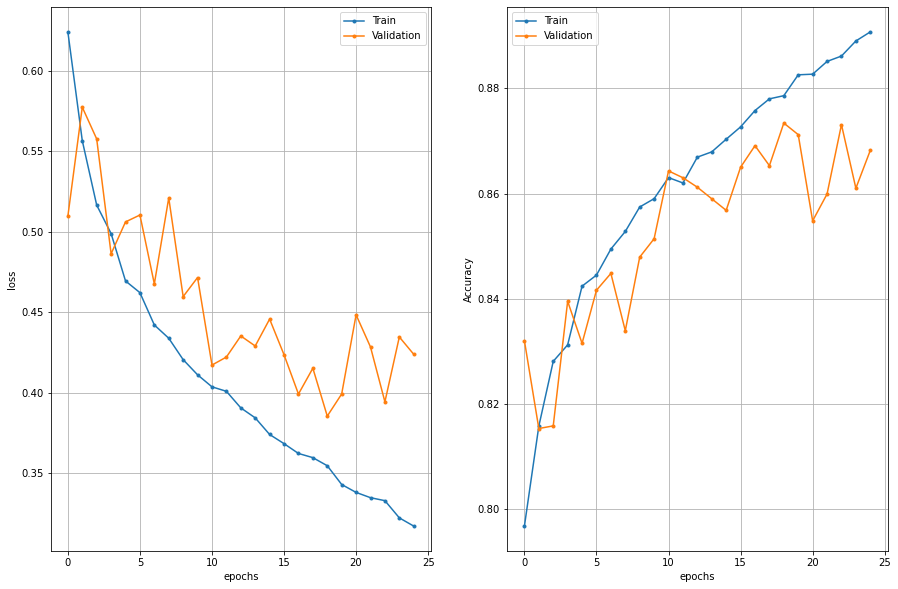

In [14]:
# Show training history
show_fit_history(history)

In [15]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)

print('True', y_true[0:10])
print('Pred', np.argmax(y_pred[0:10, :], axis=1));
#print('Pred', y_pred[0:10, :])
#print(y_pred.shape)

313/313 [==============================] - 11s 33ms/step
True [3 8 8 0 6 6 1 6 3 1]
Pred [3 8 8 0 6 6 1 6 3 1]


In [16]:
# Compute and print the accuracy for each class
y_pred = np.argmax(y_pred, axis=1)

for class_id, class_name in classes.items():
    
    mask = y_true == class_id
    tp = np.sum(y_pred[mask] == class_id)
    total = np.sum(mask)
    
    acc = tp/total
    print('Class:', class_name, '\tAccuracy =', acc)

Class: plane 	Accuracy = 0.928
Class: car 	Accuracy = 0.937
Class: bird 	Accuracy = 0.813
Class: cat 	Accuracy = 0.648
Class: deer 	Accuracy = 0.9
Class: dog 	Accuracy = 0.72
Class: frog 	Accuracy = 0.948
Class: horse 	Accuracy = 0.918
Class: ship 	Accuracy = 0.92
Class: truck 	Accuracy = 0.95


In [17]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 [==============================] - 8s 27ms/step - loss: 0.4239 - accuracy: 0.8682
Test loss   0.423906534910202
Test metric 0.8682000041007996


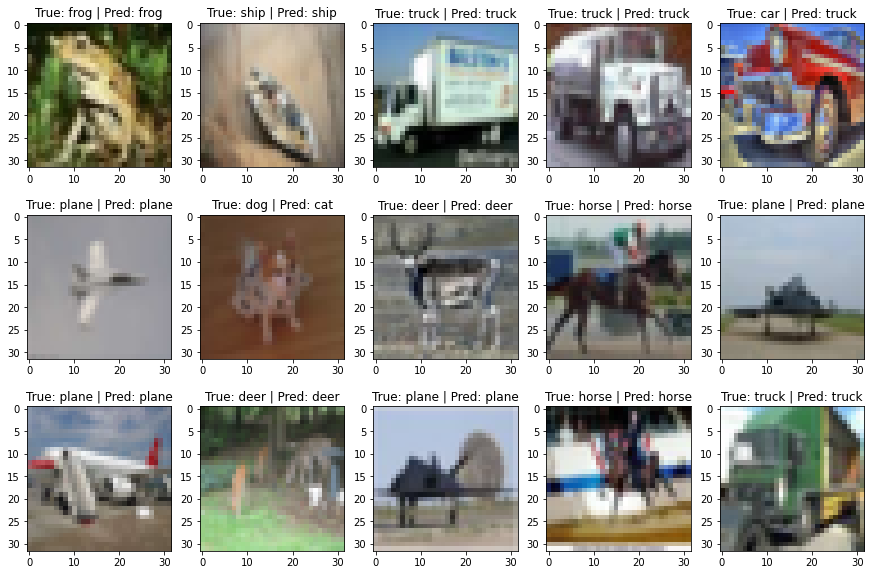

In [19]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(0, y_test.shape[0])
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))

**Answers**

    Final overall classifier accuracy: 0.868.

    In my case, the lowest classification accuracy was obtained for the cat and dog classes, 0.648 and 0.72 respectively. I would first of all increase the amount of data for the network training.

    The accuracy of the network has increased significantly with the addition of additional layers such as Dropout, BatchNormalization, and also after Data Augmentation.